In [1]:
#----- モジュールの読み込み -----

import numpy
from keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.utils.np_utils import to_categorical
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
#----- 特徴量、画像データの読み込み -----
#データ数は学習：テスト = 60000枚 : 10000枚

(data_train, label_train), (data_test, label_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# ----- 層のパラメータ、伝搬のさせ方設定 -----

model = Sequential()

model.add(Dense(200, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dropout(0.3))

model.add(Dense(200))
model.add(Activation("sigmoid"))
model.add(Dropout(0.3))

model.add(Dense(10))
model.add(Activation("softmax"))

In [4]:
#-----　学習のさせ方設定　-----


model.compile(loss='categorical_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])


## 画像データ変換
data_train = data_train.reshape(60000, 784) # 2次元配列を1次元に変換
data_test = data_test.reshape(10000, 784)
data_train = data_train.astype('float32')   # int型をfloat32型に変換
data_test = data_test.astype('float32')
data_train /= 255.0                        # [0-255]の値を[0.0-1.0]に変換
data_test /= 255.0

## ラベル変換
label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

print("■サンプル数")
print(data_train.shape[0], 'train samples')
print(data_test.shape[0], 'test samples')



■サンプル数
60000 train samples
10000 test samples


In [5]:
#-----　ネットワークの学習と評価　-----

print("■学習と評価")
history = model.fit(data_train , label_train , epochs=30 , batch_size=512 , verbose=1 , validation_data=(data_test , label_test))


■学習と評価
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 43us/step - loss: 1.3478 - acc: 0.5773 - val_loss: 0.5277 - val_acc: 0.8722
Epoch 2/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.4885 - acc: 0.8592 - val_loss: 0.3231 - val_acc: 0.9087
Epoch 3/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.3654 - acc: 0.8939 - val_loss: 0.2717 - val_acc: 0.9213
Epoch 4/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.3157 - acc: 0.9072 - val_loss: 0.2403 - val_acc: 0.9289
Epoch 5/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.2816 - acc: 0.9168 - val_loss: 0.2131 - val_acc: 0.9354
Epoch 6/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.2537 - acc: 0.9243 - val_loss: 0.1973 - val_acc: 0.9406
Epoch 7/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.2335 - acc: 0.9306 - val_loss: 0.1800 - 

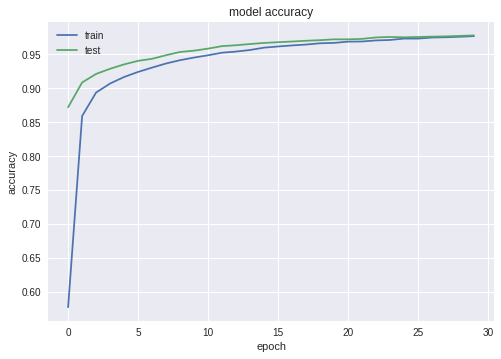

In [6]:
#----- グラフ出力　-----

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

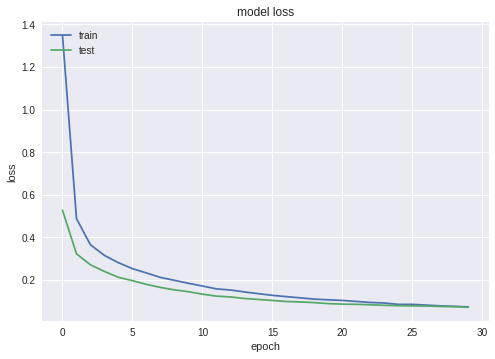

In [7]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
